<h1>1. Importing Python Packages and Datasets</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [3]:
trainingDataset = pd.read_csv('train_s3TEQDk.csv')
testDataset = pd.read_csv('test_mSzZ8RL.csv')
trainingDataset.head(10)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [4]:
testDataset.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


<h1>2. Missing Values and Data Pre-processing</h1>

In [5]:
trainingDataset.isnull().sum()   #Getting number of null values for each column

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
print('Percent of missing "Credit_Product" is ' ,(trainingDataset['Credit_Product'].isnull().sum()/trainingDataset.shape[0])*100)

Percent of missing "Credit_Product" is  11.9340726421813


<h3> Almost 10% data is missing. Evaluating Credit_Product Column </h3>

Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):
No     144357
Yes     72043
Name: Credit_Product, dtype: int64

The probability of having Credit_Product as NO or Yes is
 No     0.667084
Yes    0.332916
Name: Credit_Product, dtype: float64


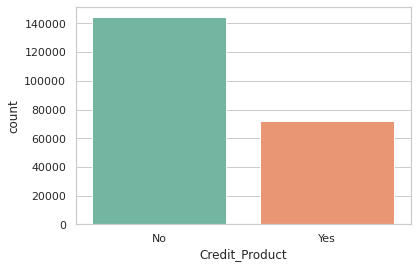

In [7]:
print('Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):')
print(trainingDataset['Credit_Product'].value_counts())
print('\nThe probability of having Credit_Product as NO or Yes is\n',trainingDataset['Credit_Product'].value_counts('No') )
sns.countplot(x='Credit_Product', data=trainingDataset, palette='Set2')
plt.show()

<h1>3. Adjusting Data</h1>

<p> 1. Filling the 'Credit_Product' field using Interpolation method of 'ForwardFill', so as to reduce the biasing towards 
        most frequent category i.e 'No'<p>
<p> 2. Dropping the column 'Region_Code' and 'ID' because less Relevance on classification<p>


In [8]:
trainingDataset=trainingDataset.fillna(method = 'ffill')
trainingDataset.drop('Region_Code',axis=1, inplace=True)
trainingDataset.drop('ID', axis=1, inplace=True)

In [9]:
trainingDataset.isnull().sum()  #Getting number of null values for each column

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

<h3> As seen above Probability of occurance of Yes and No remains same, hence biasing didn't happen after filling missing values</h3>

In [10]:
trainingDataset.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0


Using LabelEncoder to encode categorical data of only two categories to 0 and 1
Using pandas get_dummies() function to encode categorical data with more than 2 categories

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data = trainingDataset.copy()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Credit_Product'] = le.fit_transform(train_data['Credit_Product'])
train_data['Is_Active'] = le.fit_transform(train_data['Is_Active'])

train_data=pd.get_dummies(train_data, columns=["Occupation","Channel_Code"])
train_data.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,43,0,1045696,0,0,0,1,0,0,0,0,1,0
1,0,30,32,0,581988,0,0,0,0,1,0,1,0,0,0
2,0,56,26,0,1484315,1,0,0,0,0,1,0,0,1,0
3,1,34,19,0,470454,0,0,0,0,1,0,1,0,0,0
4,0,30,33,0,886787,0,0,0,0,1,0,1,0,0,0


<h1>4. Applying Same Changes to Test Dataset</h1>

In [12]:
print('------------------------------------------------------------')
print('Before Adjusting Data')
print(testDataset.isnull().sum()) #Getting number of null values for each column
print('Percent of missing "Credit_Product" is ' ,(testDataset['Credit_Product'].isnull().sum()/testDataset.shape[0])*100)
test_data = testDataset.copy()
test_data=testDataset.fillna(method = 'ffill')
test_data.drop('Region_Code',axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)
print('------------------------------------------------------------')
print('After Adjusting Data')
test_data.isnull().sum()

------------------------------------------------------------
Before Adjusting Data
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64
Percent of missing "Credit_Product" is  11.890382862351869
------------------------------------------------------------
After Adjusting Data


Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [13]:
test_data['Gender'] = le.fit_transform(test_data['Gender'])
test_data['Credit_Product'] = le.fit_transform(test_data['Credit_Product'])
test_data['Is_Active'] = le.fit_transform(test_data['Is_Active'])

test_data=pd.get_dummies(test_data, columns=["Occupation","Channel_Code"])
test_data.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,25,1,742366,0,0,1,0,0,1,0,0,0
1,1,43,49,1,925537,0,0,1,0,0,0,1,0,0
2,1,31,14,0,215949,0,0,0,1,0,1,0,0,0
3,1,29,33,0,868070,0,0,1,0,0,1,0,0,0
4,0,29,19,0,657087,0,0,1,0,0,1,0,0,0


<h1>5. Exploratory Data Analysis</h1>

<h3>A. Exploration of Age Variable</h3>

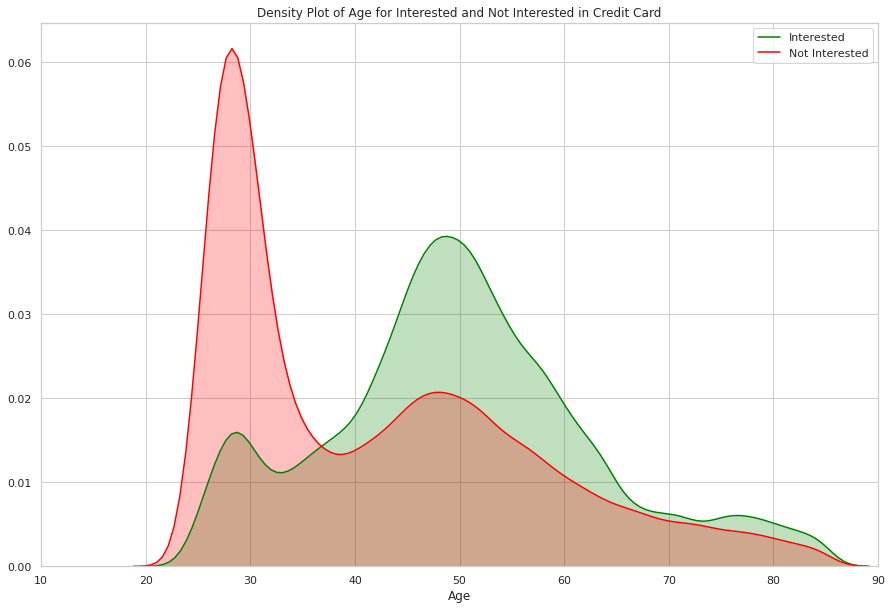

In [14]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Age"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Age"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Interested', 'Not Interested'])
plt.title('Density Plot of Age for Interested and Not Interested in Credit Card')
kdePlot.set(xlabel='Age')
plt.xlim(10,90)
plt.show()

<p>From Above graph its safe to say that people between age group 20 and 35 mostly not interested in getting a credit card.</p>
<p>Also people from age group 35 to 65 mostly got Credit Card</p>
    

<h3>B. Exploration of Gender Variable</h3>

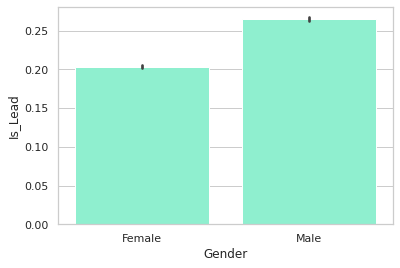

In [15]:
sns.barplot('Gender', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

<p>Although there's more number of interested Male customers than Female customers, but the difference is not significant enough to classify</p>

<h3>C. Exploration of Occupation</h3>

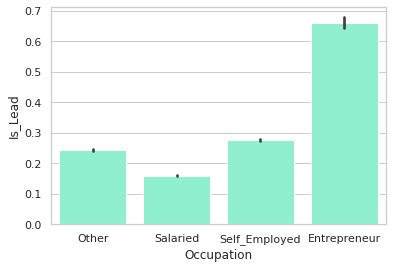

In [16]:
sns.barplot('Occupation', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

<p>It Seems that Entrepreneurs preferred having a credit card more than any other Occupation Category and Salaried Customers are least likely to get a credit card</p>

<h3>D. Exploration of Average Account Balance Variable</h3>

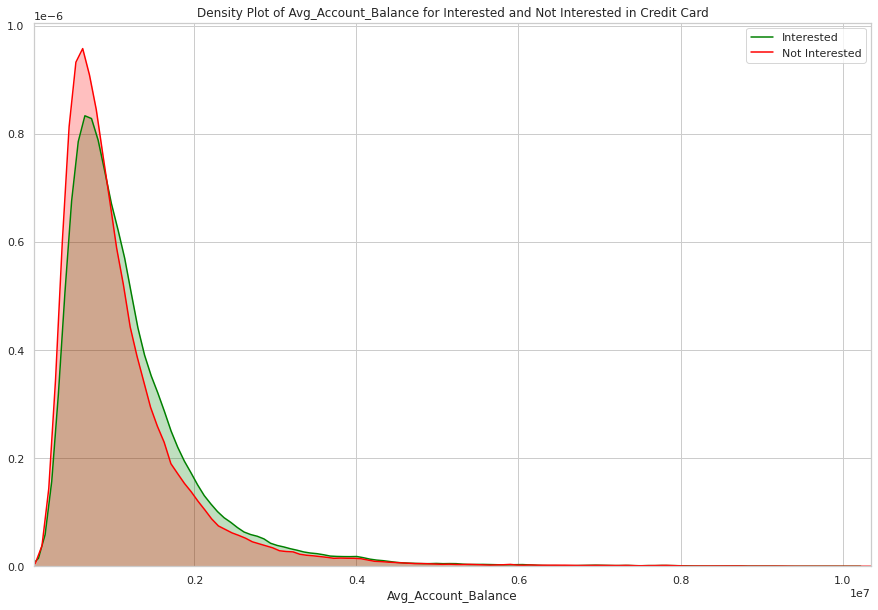

In [17]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Avg_Account_Balance"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Avg_Account_Balance"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Interested', 'Not Interested'])
plt.title('Density Plot of Avg_Account_Balance for Interested and Not Interested in Credit Card')
kdePlot.set(xlabel='Avg_Account_Balance')
plt.xlim(min(train_data['Avg_Account_Balance']),max(train_data['Avg_Account_Balance']))
plt.show()

<p>Average Salary Doesn't make a difference on Customer's decision of getting a Credit Card</p>

<h3>E. Exploration of Vintage Variable</h3>

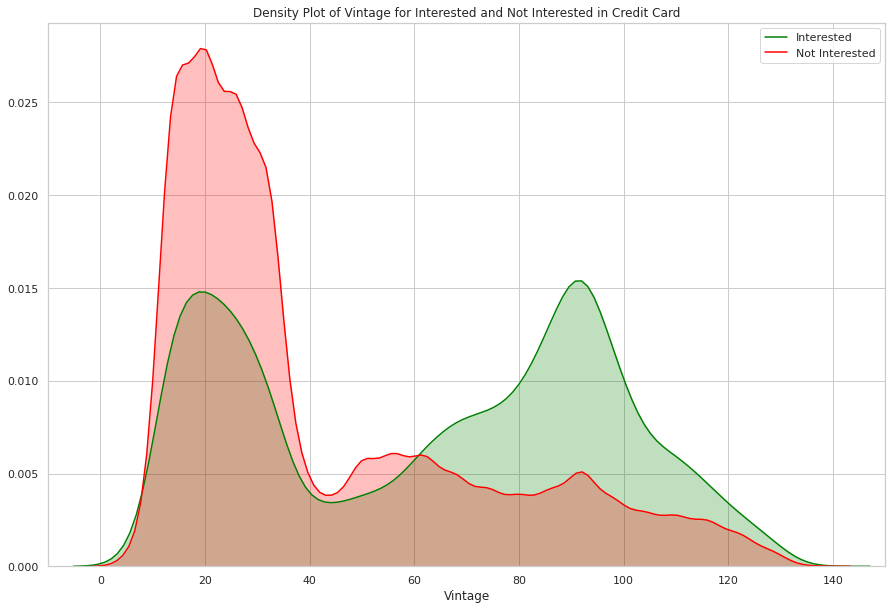

In [18]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Vintage"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Vintage"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Interested', 'Not Interested'])
plt.title('Density Plot of Vintage for Interested and Not Interested in Credit Card')
kdePlot.set(xlabel='Vintage')
plt.xlim(-10,150)
plt.show()

1. Customers having vintage from 0 to 50 are less likely to get a credit card
2. Customers having above 60 vintage are more likely to get a credit acrd

<h3>F. Exploration of Is_Active Variable</h3>

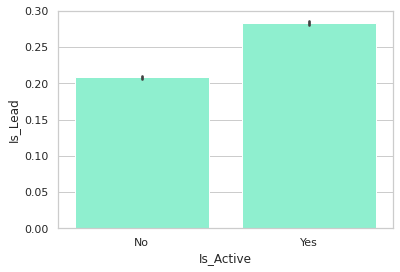

In [19]:
sns.barplot('Is_Active', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

As seen in the plot above, not much of a difference is present in the likability of taking credit card using customer's Active status

<h3>G. Exploration of Credit Product Variable</h3>

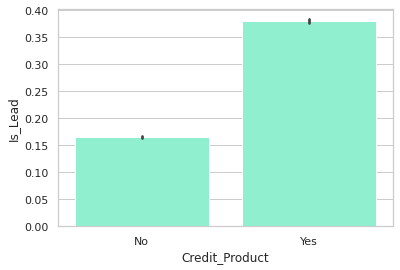

In [20]:
sns.barplot('Credit_Product', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

Very Significant difference is observed in the customers who have and don't have credit product

<h3>H. Exploration of Channel Code</h3>

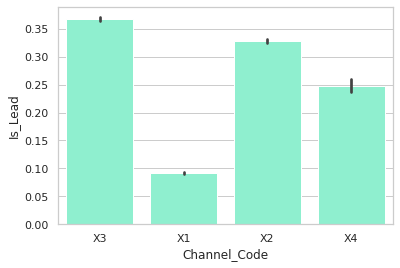

In [21]:
sns.barplot('Channel_Code', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

It seems that customers with X3 channel code are more likely to take a credit card

<h1>6. Feature Scaling</h1>

Using the EDA done before
I've removed following columns
1. Average_Account_Balance : As seen in graph it doesn't give any difference in customer's interest behaviour, hence removing this variable to not overfit the model
2. Occupation_Self_Employed : Its a correlated variable, for eg. when Occupation_Entrepreneur, Occupation_Salaried and Occupation_Other are all 0 that means Occupation_Self_Employed have the value 1. To remove redundant information i've removed this column.
3. Channel_Code_X4 : Same reason as for Occupation_Self_Employed
4. Is_Active : As mentioned in my EDA, this variable doesn't contribute much in classification

Making use of RFECV (Recursive Feature Elimination and Cross-Validation Selection), an algorithm that eliminates irrelevant features based on validation scores, to get most relevant features apart from my own EDA.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

columns = ['Gender', 'Age', 'Vintage', 'Credit_Product', 'Occupation_Entrepreneur', 
           'Occupation_Other','Occupation_Salaried', 'Channel_Code_X1','Channel_Code_X2', 'Channel_Code_X3'] 
X = train_data[columns]
y = train_data['Is_Lead']

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: " , rfecv.n_features_)
print('Selected features: ' , list(X.columns[rfecv.support_]))

Optimal number of features:  10
Selected features:  ['Gender', 'Age', 'Vintage', 'Credit_Product', 'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3']


<h1>7. Model evaluation based on train/test split using train_test_split() function</h1>

Train/test split

Split the dataset into two pieces, so that the model can be trained and tested on different data
Testing accuracy is a better estimate than training accuracy of out-of-sample performance
Problem with train/test split
It provides a high variance estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
Testing accuracy can change a lot depending on a which observation happen to be in the testing set

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

Selected_features = list(X.columns[rfecv.support_])
X = train_data[Selected_features]
y = train_data['Is_Lead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred_probability = classifier.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_probability)
cm = confusion_matrix(y_test, y_pred)
print('Train/Test split results:')
print("Logistic Regression accuracy is ", accuracy_score(y_test, y_pred))
print("Logistic Regression log_loss is ", log_loss(y_test, y_pred_probability))
print("Logistic Regression AUC score is ", auc(fpr, tpr))
print("Confusion Matrix \n", cm)

Train/Test split results:
Logistic Regression accuracy is  0.7808118832027673
Logistic Regression log_loss is  0.4677775146495346
Logistic Regression AUC score is  0.7543097584748826
Confusion Matrix 
 [[35546  2047]
 [ 8725  2827]]


<h3>The Accuracy and AUC score looks satisfying. Using this model to predict the Is_Lead status of test dataset</h3>

In [24]:
# test_data['Is_Lead'] = classifier.predict(test_data[Selected_features])
# test_data['ID'] = testDataset['ID']

# submission = test_data[['ID','Is_Lead']]

# submission.to_csv("submission.csv", index=False)

# submission.tail()

In [25]:

logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.779
LogisticRegression average log_loss is 0.471
LogisticRegression average auc is 0.753


In [26]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.779 (+/-0.002)
LogisticRegression average log_loss: 0.471 (+/-0.001)
LogisticRegression average auc: 0.753 (+/-0.002)


In [ ]:
from sklearn.model_selection import GridSearchCV

X = train_data[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_http://127.0.0.1:8888/?token=b4d3cb276fee2e9d1220988dfe9f499ae82a8bbd4a456636

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
train_data.columns

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
test_data['Is_Lead'] = log_clf.predict(test_data[Selected_features])
test_data['ID'] = testDataset['ID']

submission = test_data[['ID','Is_Lead']]
submission.to_csv("submission.csv", index=False)

submission.tail()

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_resample(X, y)
counter = Counter(y_resample)
#print(counter)

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape)

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

#log_clf.fit(X, y)
log_clf.fit(X_resample, y_resample)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()